# Timeseries Prediction

In [5]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import cython

In [2]:
#fbprophet library relies on the STAN programming language, named in honor of the mathematician Stanislaw Ulam. 
#Before installing fbprophet, we therefore need to make sure that the pystan Python wrapper to STAN is installed
!pip install pystan

    100% |████████████████████████████████| 68.1MB 12kB/s eta 0:00:011  3% |█▏                              | 2.4MB 12.6MB/s eta 0:00:06    5% |█▊                              | 3.7MB 11.7MB/s eta 0:00:06
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
#install fbprophet
!pip install fbprophet

  Running setup.py bdist_wheel for fbprophet ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/71/b3/f1/e6668a53f3d537b5c160dbc13c7d463893a28c67d6c9c4fe20
Successfully built fbprophet
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from fbprophet import Prophet

In [6]:
#read the data set
df = pd.read_csv('AirPassengers.csv')

df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [8]:
#convert the month column into datatime column
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

Prophet also imposes the strict condition that the input columns be named ds (the time column) and y (the metric column), so let's rename the columns in our DataFrame:

In [9]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


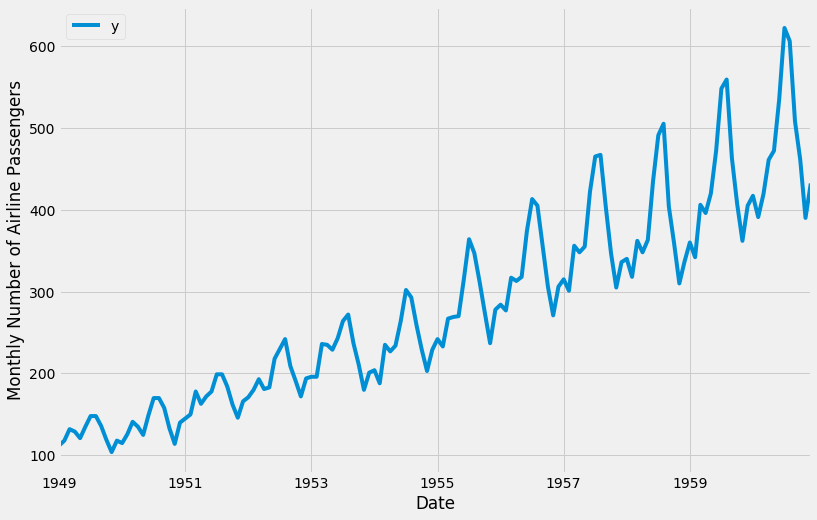

In [10]:
#visualize the data 
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

With our data now prepared, we are ready to use the Prophet library to produce forecasts of our time series.

## Time Series Forecasting with Prophet

The authors of Prophet have abstracted away many of the inherent complexities of time series forecasting and made it more intuitive for analysts and developers alike to work with time series data.

In [11]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [12]:
#fit the data on phrophet object
my_model.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions

Prophet provides the make_future_dataframe helper function to  create this DataFrame

In [14]:
#use Prophet to generate 36 datestamps in the future
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


When working with Prophet, it is important to consider the frequency of our time series. Because we are working with monthly data, we clearly specified the desired frequency of the timestamps (in this case, MS is the start of the month). Therefore, the make_future_dataframe generated 36 monthly timestamps for us. In other words, we are looking to predict future values of our time series 3 years into the future.

In [15]:
#predict the values for future data
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.822900,605.676269,692.871957
176,1963-09-01,602.508589,561.152750,648.525398
177,1963-10-01,566.323180,523.419060,610.385690
178,1963-11-01,534.463209,492.805405,577.867950
179,1963-12-01,564.059804,521.322779,610.250665


* ds: the datestamp of the forecasted value
* yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
* yhat_lower: the lower bound of our forecasts
* yhat_upper: the upper bound of our forecasts

### Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts

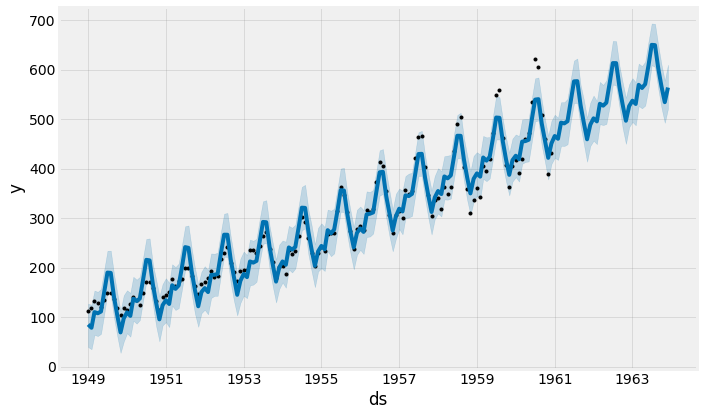

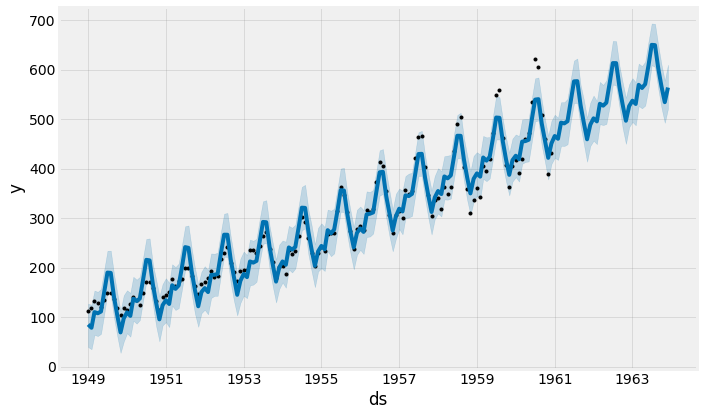

In [16]:
my_model.plot(forecast,
              uncertainty=True)

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

### One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series contribute to the overall forecasted values:

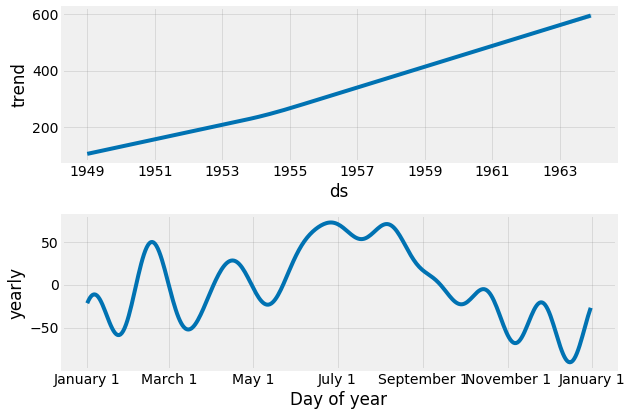

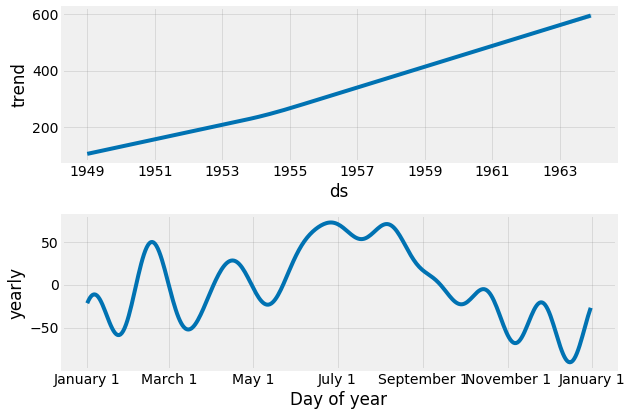

In [17]:
my_model.plot_components(forecast)